In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import warnings

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
def read_car_data():
    car_data = pd.read_csv('NEW_car_emission_dataset.csv', delimiter=';')
    return car_data

In [3]:
car_data = read_car_data()
car_data.head()

,YEAR,CAR TYPE,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,1995,ACURA INTEGRA,SUBCOMPACT,1.800,4,A4,X,11.600,8.300,10.100,28,232
1,1995,ACURA INTEGRA,SUBCOMPACT,1.800,4,M5,X,11.000,8.300,9.800,29,225
2,1995,ACURA INTEGRA GS-R,SUBCOMPACT,1.800,4,M5,Z,10.800,8.300,9.700,29,223
3,1995,ACURA LEGEND,COMPACT,3.200,6,A4,Z,14.200,10.500,12.500,23,288
4,1995,ACURA LEGEND COUPE,COMPACT,3.200,6,A4,Z,14.600,11.000,13.000,22,299


In [4]:
car_data.tail()

,YEAR,CAR TYPE,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
23013,2022,Volvo XC40 T5 AWD,SUV: Small,2.000,4,AS8,Z,10.700,7.700,9.400,30,219
23014,2022,Volvo XC60 B5 AWD,SUV: Small,2.000,4,AS8,Z,10.500,8.100,9.400,30,219
23015,2022,Volvo XC60 B6 AWD,SUV: Small,2.000,4,AS8,Z,11.000,8.700,9.900,29,232
23016,2022,Volvo XC90 T5 AWD,SUV: Standard,2.000,4,AS8,Z,11.500,8.400,10.100,28,236
23017,2022,Volvo XC90 T6 AWD,SUV: Standard,2.000,4,AS8,Z,12.400,8.900,10.800,26,252


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23018 entries, 0 to 23017
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   23018 non-null  int64  
 1   CAR TYPE               23018 non-null  object 
 2   VEHICLE CLASS          23018 non-null  object 
 3   ENGINE SIZE (L)        23018 non-null  float64
 4   CYLINDERS              23018 non-null  int64  
 5   TRANSMISSION           23018 non-null  object 
 6   FUEL TYPE              23018 non-null  object 
 7   FUEL CONSUMPTION CITY  23018 non-null  float64
 8   FUEL CONSUMPTION HWY   23018 non-null  float64
 9   COMB (L/100 km)        23018 non-null  float64
 10  COMB (mpg)             23018 non-null  int64  
 11  CO2 EMISSIONS          23018 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 2.1+ MB


In [6]:
car_data.describe()

,YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
count,23018.000,23018.000,23018.000,23018.000,23018.000,23018.000,23018.000,23018.000
mean,2009.936,3.276,5.757,12.848,9.031,11.132,27.164,252.936
std,7.613,1.332,1.804,3.529,2.343,2.955,7.394,61.750
min,1995.000,0.800,2.000,3.500,3.200,3.600,11.000,83.000
25%,2004.000,2.000,4.000,10.500,7.400,9.100,22.000,211.000
50%,2010.000,3.000,6.000,12.300,8.600,10.700,26.000,246.000
75%,2016.000,4.000,6.000,14.900,10.300,12.800,31.000,292.000
max,2022.000,8.400,16.000,30.600,20.900,26.100,78.000,608.000


In [7]:
car_data.columns

Index(['YEAR', 'CAR TYPE', 'VEHICLE CLASS', 'ENGINE SIZE (L)', 'CYLINDERS',
       'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY',
       'FUEL CONSUMPTION HWY', 'COMB (L/100 km)', 'COMB (mpg)',
       'CO2 EMISSIONS'],
      dtype='object')

In [8]:
car_data.isna().sum()

,0
YEAR,0
CAR TYPE,0
VEHICLE CLASS,0
ENGINE SIZE (L),0
CYLINDERS,0
TRANSMISSION,0
FUEL TYPE,0
FUEL CONSUMPTION CITY,0
FUEL CONSUMPTION HWY,0
COMB (L/100 km),0


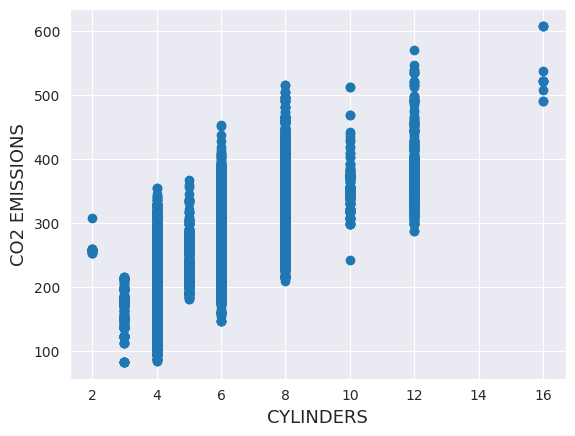

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['CYLINDERS'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('CYLINDERS', fontsize=13)
plt.show()

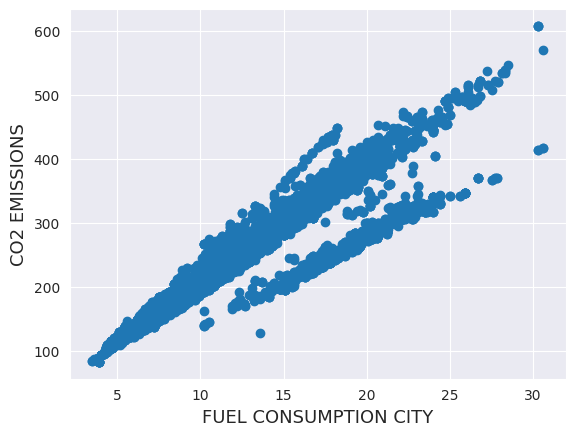

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['FUEL CONSUMPTION CITY'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('FUEL CONSUMPTION CITY', fontsize=13)
plt.show()

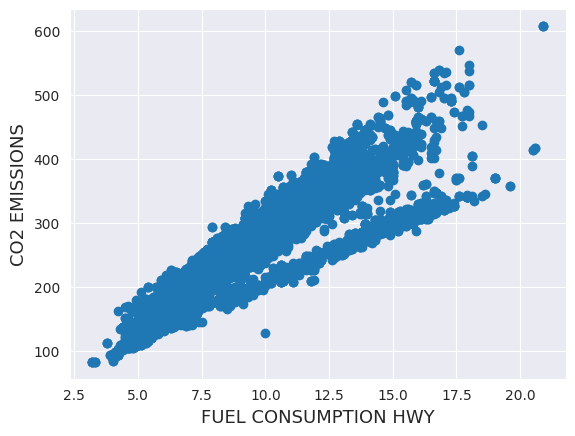

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['FUEL CONSUMPTION HWY'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('FUEL CONSUMPTION HWY', fontsize=13)
plt.show()

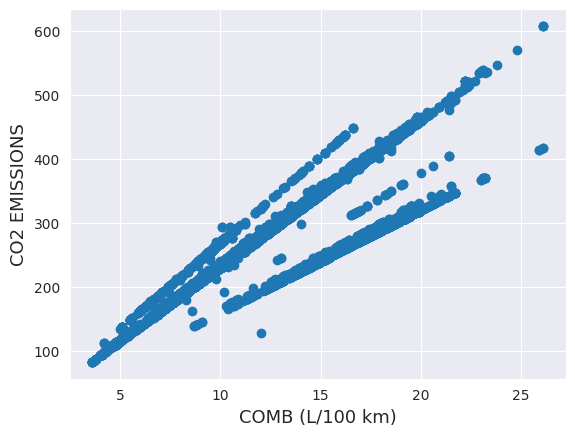

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['COMB (L/100 km)'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('COMB (L/100 km)', fontsize=13)
plt.show()

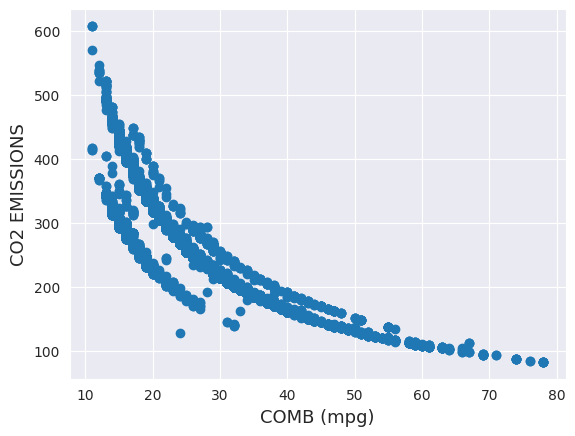

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['COMB (mpg)'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('COMB (mpg)', fontsize=13)
plt.show()

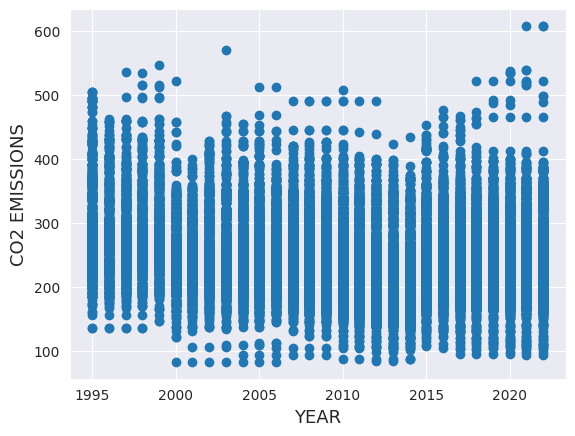

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['YEAR'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('YEAR', fontsize=13)
plt.show()

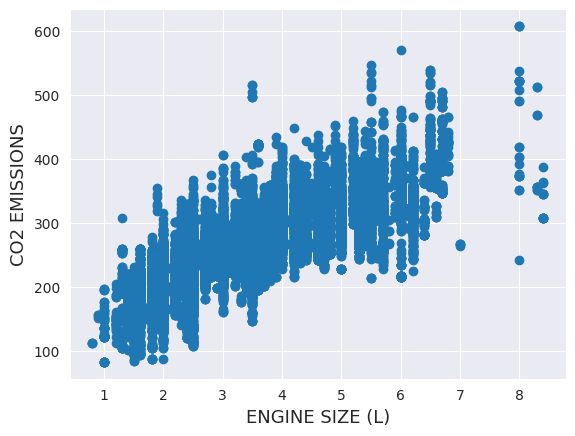

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['ENGINE SIZE (L)'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('ENGINE SIZE (L)', fontsize=13)
plt.show()

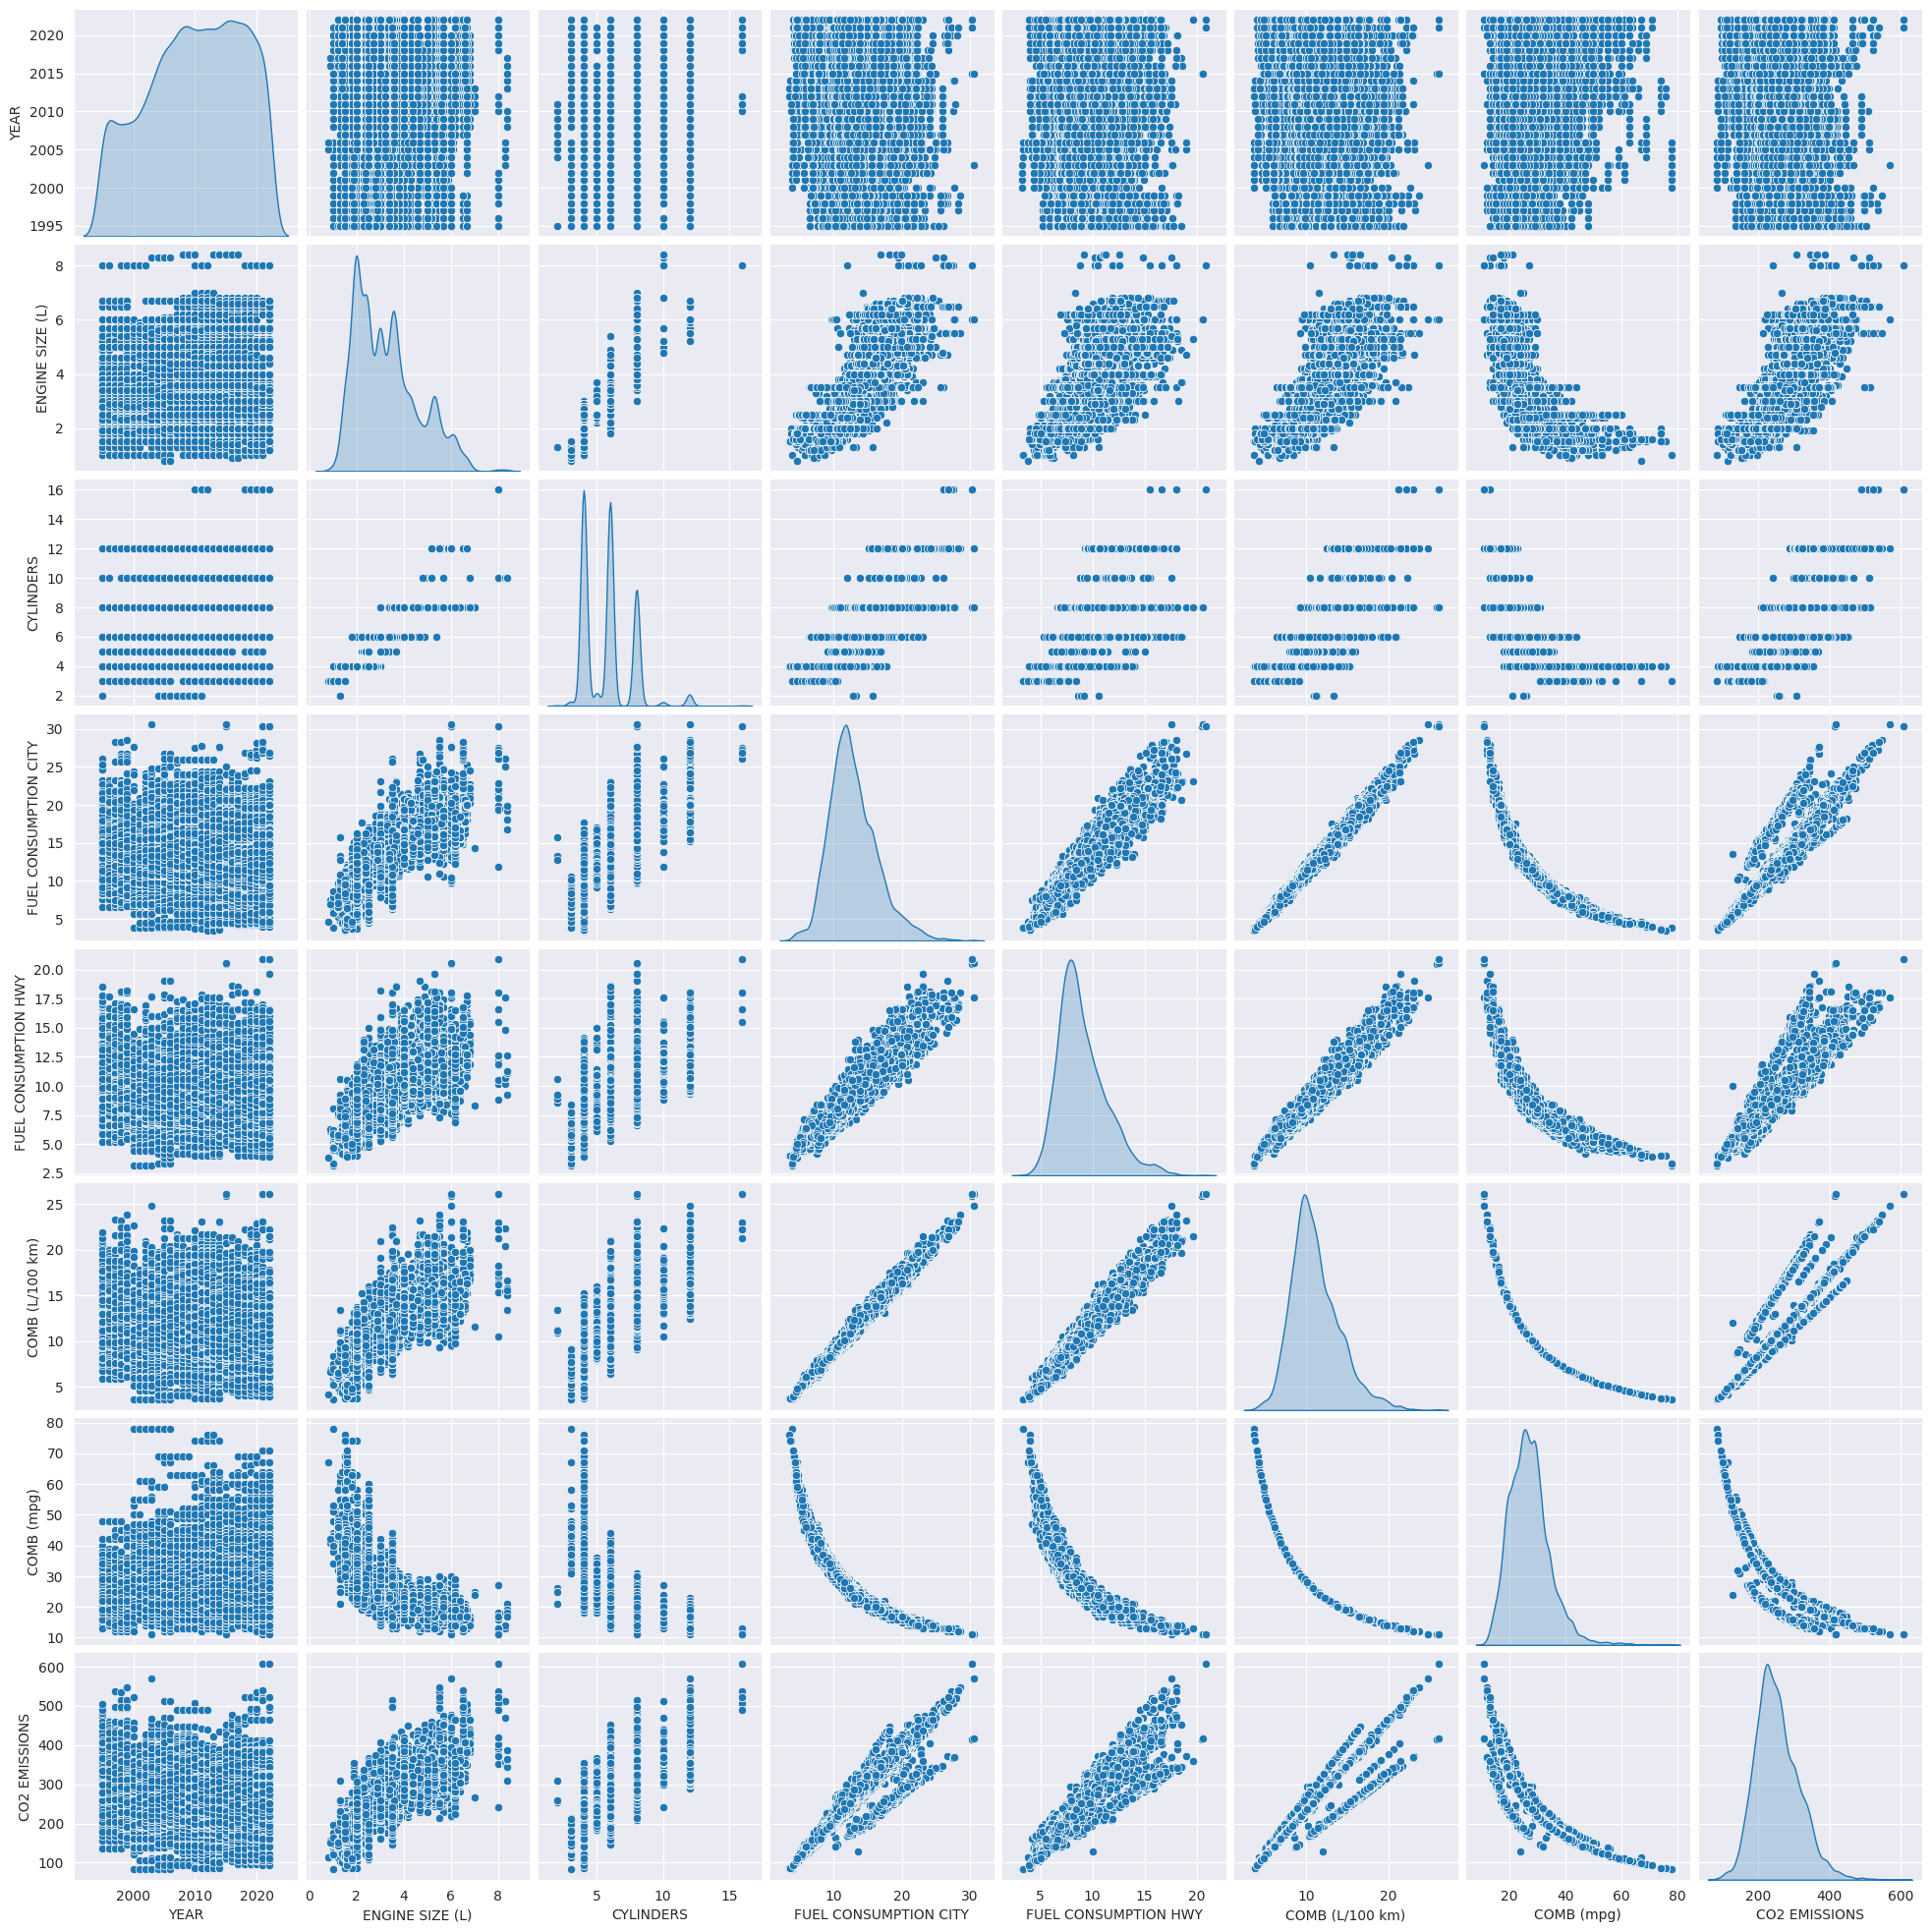

In [16]:
sns.pairplot(car_data[['CAR TYPE', 'YEAR', 'VEHICLE CLASS', 'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY'
                , 'FUEL CONSUMPTION HWY', 'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS']], diag_kind='kde')

In [17]:
# Max limit input
max_limit_input = float(input("Set the maximum limit of carbon emissions per day (gram): "))
# Set the user car's detail
mileage = float(input("Enter your car mileage in km: "))
car_type = input("Enter your car type: ")
car_year = int(input("Enter your car year: "))
fuel_type = input("Enter your car fuel type: ")
car_transmission = input("Enter your car transmission: ")

usercar = car_data.loc[(car_data['CAR TYPE'] == car_type) & (car_data['YEAR'] == car_year) & (car_data['FUEL TYPE'] == fuel_type) & (car_data['TRANSMISSION'] == car_transmission)]

Set the maximum limit of carbon emissions per day (gram): 2000
Enter your car mileage in km: 15
Enter your car type: ACURA INTEGRA
Enter your car year: 1995
Enter your car fuel type: X
Enter your car transmission: A4


In [18]:
lect = LabelEncoder()
car_data['CAR TYPE'] = lect.fit_transform(car_data['CAR TYPE'])
usercar['CAR TYPE'] = lect.transform(usercar['CAR TYPE'])

ley = LabelEncoder()
car_data['YEAR'] = ley.fit_transform(car_data['YEAR'])
usercar['YEAR'] = ley.transform(usercar['YEAR'])

levc = LabelEncoder()
car_data['VEHICLE CLASS'] = levc.fit_transform(car_data['VEHICLE CLASS'])
usercar['VEHICLE CLASS'] = levc.transform(usercar['VEHICLE CLASS'])

lees = LabelEncoder()
car_data['ENGINE SIZE (L)'] = levc.fit_transform(car_data['ENGINE SIZE (L)'])
usercar['ENGINE SIZE (L)'] = levc.transform(usercar['ENGINE SIZE (L)'])

lecs = LabelEncoder()
car_data['CYLINDERS'] = lecs.fit_transform(car_data['CYLINDERS'])
usercar['CYLINDERS'] = lecs.transform(usercar['CYLINDERS'])

letr = LabelEncoder()
car_data['TRANSMISSION'] = letr.fit_transform(car_data['TRANSMISSION'])
usercar['TRANSMISSION'] = letr.transform(usercar['TRANSMISSION'])

left = LabelEncoder()
car_data['FUEL TYPE'] = left.fit_transform(car_data['FUEL TYPE'])
usercar['FUEL TYPE'] = left.transform(usercar['FUEL TYPE'])

In [19]:
labels = np.array(car_data['CO2 EMISSIONS'])
car_data = car_data.drop('CO2 EMISSIONS', axis = 1)
real = np.array(usercar['CO2 EMISSIONS'])
usercar = usercar.drop('CO2 EMISSIONS', axis = 1)
datalist = list(car_data.columns)
car_data = np.array(car_data)

In [20]:
# Select relevant features for training the model
features = ['YEAR', 'CAR TYPE', 'VEHICLE CLASS', 'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY', 'FUEL CONSUMPTION HWY', 'COMB (mpg)', 'COMB (L/100 km)']
target = 'CO2 EMISSIONS'

In [21]:
train_data, test_data, train_target, test_target = train_test_split(
        car_data, labels, test_size=0.2, random_state=42
        )

In [40]:
from tensorflow.keras import regularizers

# Define the model with slight tweaks
model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(len(features),)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 512)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,689 (698.00 KB)

 Trainable params: 178,689 (698.00 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Early stopping callback with reduced patience
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with reduced epochs and increased batch size
history = model.fit(train_data, train_target, epochs=100, verbose=1, batch_size=32, callbacks=[callback], validation_split=0.2)

Epoch 1/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 176.8817 - val_loss: 36.7539
Epoch 2/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 85.1961 - val_loss: 24.3853
Epoch 3/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 60.4287 - val_loss: 43.1161
Epoch 4/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 69.0156 - val_loss: 279.2700
Epoch 5/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 100.7231 - val_loss: 241.7290
Epoch 6/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 117.7086 - val_loss: 23.1393
Epoch 7/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 52.0525 - val_loss: 136.1164
Epoch 8/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 131.9753 - val_loss: 40.6132
Epoch 9/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 71.3652 - val_loss: 28.0053
Epoch 10/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 65.5563 - val_loss: 86.5286
Epoch 11/100
461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 69.8861 - val_loss: 28.3998
Epoch 12/100

In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [CO2 EMISSION]')
  plt.legend()
  plt.grid(True)

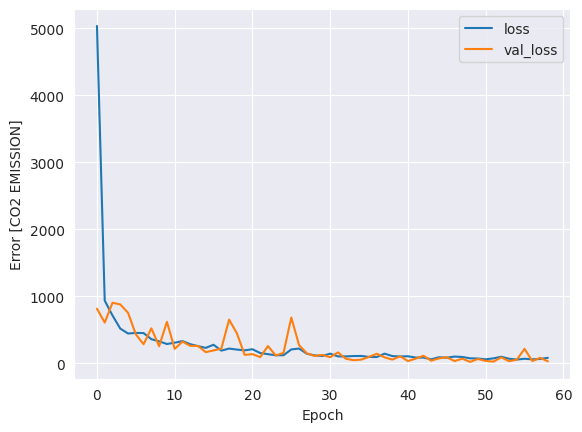

In [43]:
plot_loss(history)

In [ ]:
prediction = model.predict(test_data)
print(prediction)

In [ ]:
# Function to read car data from the CSV database
def read_car_data():
    car_data = {}
    with open('NEW_car_emission_dataset.csv', 'r') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            car_type = row['CAR TYPE']
            car_year = int(row['YEAR'])
            vehicle_class = row['VEHICLE CLASS']
            engine_size = float(row['ENGINE SIZE (L)'])
            cylinders = int(row['CYLINDERS'])
            transmission = row['TRANSMISSION']
            fuel_type = row['FUEL TYPE']
            fuel_consumption_city = float(row['FUEL CONSUMPTION CITY'])
            fuel_consumption_highway = float(row['FUEL CONSUMPTION HWY'])
            comb1 = float(row['COMB (L/100 km)'])
            comb2 = float(row['COMB (mpg)'])
            co2_emission = float(row['CO2 EMISSIONS'])
            if car_type not in car_data:
                car_data[car_type] = []
            car_data[car_type].append({
                    'car_year': car_year,
                    'vehicle_class': vehicle_class,
                    'engine_size' : engine_size,
                    'cylinders' : cylinders,
                    'transmission': transmission,
                    'fuel_type': fuel_type,
                    'fuel_consumption_city': fuel_consumption_city,
                    'fuel_consumption_highway': fuel_consumption_highway,
                    'comb1' : comb1,
                    'comb2' : comb2,
                    'co2_emission': co2_emission
            })
    return car_data

In [ ]:
# Function to calculate carbon emissions
def calculate_carbon_emissions(car_type, car_year, mileage, car_data, emission):
    warnings.simplefilter(action='ignore', category=FutureWarning)

    if car_type in car_data:
        cars = car_data[car_type]
        for car in cars:
            if car['car_year'] == car_year:
                #co2_emission = car['co2_emission']
                #total_emissions = mileage * co2_emission
                total_emissions = mileage * emission
                return total_emissions
    return None

In [ ]:
def display_warning(carbon_emission, max_limit):
    if carbon_emission is not None:
        if carbon_emission > max_limit:
            print("Warning: The carbon emissions of your car exceed the maximum limit.")
        else:
            carbon_remainder = max_limit - carbon_emission
            print(f"Your daily carbon emission remaining: {carbon_remainder} gram")

In [ ]:
def read_alternative_data(mileage):
  alternative_emission = {}
  with open('Alternatives.csv', 'r') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            trans_type = row['Transportation']
            trans_emission = int(row['CO2 Emission (g/km)'])
            alternative_emission[trans_type] = trans_emission * int(mileage)
  return alternative_emission

In [ ]:
# Function to recommend alternatives based on their emissions
def recommendation(alternative_emission, max_limit):
    # Sort the alternative emissions dictionary by emission values in ascending order
    sorted_alternatives = sorted(alternative_emission.items(), key=lambda x: x[1])

    # Initialize a list to store recommended alternatives
    recommended_alternatives = []

    # Iterate over the sorted alternatives and check if their emissions are within the maximum limit
    for alternative, emission in sorted_alternatives:
        if emission <= max_limit:
            recommended_alternatives.append(alternative)

    # Display the recommended alternatives
    if recommended_alternatives:
        print("\nYou have exceeded the maximum limit of carbon emissions.")
        print("\nHere are some alternative transportation options with lower CO2 emissions.")
        print("Recommended alternatives:")
        for alternative in recommended_alternatives:
            alternative_emission_str = str(alternative_emission[alternative])
            print("- " + alternative + " with total emission " + alternative_emission_str + " gram")
    else:
        print("No alternatives found within the maximum limit.")

In [ ]:
# Use the trained model for prediction
def predict(car_data):
  prediction = model.predict(usercar)
  carbonpred = prediction[0][0]

  print(f"\nPredicted CO2 Emission: {carbonpred} g/km")

  # Calculate carbon emissions
  carbon_emission = calculate_carbon_emissions(car_type, car_year, mileage, car_data, carbonpred)
  if carbon_emission is not None:
      print(f"\nTotal carbon emissions: {carbon_emission} gram.")

  try:
      if carbon_emission is not None:
          max_limit = float(max_limit_input) if max_limit_input else None

          # Display a warning if emissions exceed the maximum limit
          display_warning(carbon_emission, max_limit)

          # Recommend alternatives based on their emissions
          if carbon_emission > max_limit:
              alternative_emission = read_alternative_data(mileage)
              recommendation(alternative_emission, max_limit)
      else:
          print("Error: No emissions data found for the provided vehicle information.")
  except ValueError:
        print("Error: Invalid input. Please enter numeric values for mileage, vehicle year, and maximum limit.")

# Main function
def main():
    # Read vehicle data from the CSV database
    car_data = read_car_data()

    # Run the ML model training and prediction
    predict(car_data)

# Run the main function
main()

1/1 [==============================] - 0s 77ms/step

Predicted CO2 Emission: 228.9041290283203 g/km

Total carbon emissions: 3433.5619354248047 gram.

You have exceeded the maximum limit of carbon emissions.

Here are some alternative transportation options with lower CO2 emissions.
Recommended alternatives:
- Train with total emission 615 gram
- Electric vehicle with total emission 795 gram
- Motor cycle with total emission 1545 gram
- Bus with total emission 1575 gram


In [ ]:
# Accuracy
prediction = model.predict(usercar)
carbonpred = prediction[0][0]
error = (abs(carbonpred-real[0])/real[0])*100
accuracy = abs(error-100)
print('This model hits an accuracy of ' + str(accuracy) + '% (an error of ' + str(error) + '%)')

1/1 [==============================] - 0s 21ms/step
This model hits an accuracy of 98.66557285703462% (an error of 1.3344271429653827%)
